In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

%matplotlib inline

plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.axisbelow'] = True
plt.rcParams.update({'figure.autolayout': True})

import warnings
#warnings.filterwarnings("ignore")

In [2]:
subway = pd.read_csv('ttc_subway_srt.csv')
weather = pd.read_csv('weather.csv')
holidays = pd.read_csv('holidays.csv')
locations = pd.read_csv('subway_location.csv')
ttc_stations = pd.read_csv('ttc_subway_stations.csv')
subway_log_code_description = pd.read_csv('Subway_Log_Codes.csv')

In [3]:
subway['Date'] = pd.to_datetime(subway['Date'])
weather['Date/Time'] = pd.to_datetime(weather['Date/Time'])
holidays['date'] = pd.to_datetime(holidays['date'])

weather = weather.rename(columns={
    'Date/Time': 'Date', 
    'Mean Temp (°C)': 'Mean Temp', 
    'Total Precip (mm)': 'Precipitation'
})

holidays = holidays.rename(columns={
    'date': 'Date'
})

subway['Month'] = subway['Date'].dt.month
subway['nDay'] = subway['Date'].dt.day

weather = weather.drop(columns=['Year', 'Month', 'Day'])

subway = pd.merge(subway, weather, on='Date', how='left')
subway = pd.merge(subway, holidays, on='Date', how='left')
subway = pd.merge(subway, subway_log_code_description, on='Code', how='left')

subway = subway.drop(columns=['Code Description'])


subway['holiday'] = subway['holiday'].fillna('None')
subway['Delay Group'] = subway['Delay Group'].fillna('Miscellaneous')

In [4]:
#Clean up "dirty" station names in the delay file to match actual station names
ttc_stations = ttc_stations['Station'].str.upper() 
subway['Station'] = subway['Station'].str.upper()
subway['Station'] = subway['Station'].str.strip()

#for index, row in ttc_stations.iterrows():
for row in ttc_stations:
    subway['Station'] = np.where(subway['Station'].str.contains(row)
            , row + ' STATION'
            , subway['Station'])
    
subway['Station'] = np.where(subway['Station'].str.contains('BESSARIAN STATION'), 'BESSARION STATION', subway['Station'])
subway['Station'] = np.where(subway['Station'].str.contains('BATHUSRT STATION'), 'BATHURST STATION', subway['Station'])

subway['Station'] = np.where(subway['Station'].str.contains('LEAVING YONGE/SHEPPARD'), 'SHEPPARD YONGE STATION', subway['Station'])
subway['Station'] = np.where(subway['Station'].str.contains('LEAVING YONGE-SHEPPARD'), 'SHEPPARD YONGE STATION', subway['Station'])
subway['Station'] = np.where(subway['Station'].str.contains('SHEPPARD LINE'), 'SHEPPARD YONGE STATION', subway['Station'])
subway['Station'] = np.where(subway['Station'].str.contains('SHEPPARD STATION'), 'SHEPPARD YONGE STATION', subway['Station'])
subway['Station'] = np.where(subway['Station'].str.contains('SHEPPARD STATION '), 'SHEPPARD YONGE STATION', subway['Station'])
subway['Station'] = np.where(subway['Station'].str.contains('SHEPPARD SUBWAY LINE'), 'SHEPPARD YONGE STATION', subway['Station'])
subway['Station'] = np.where(subway['Station'].str.contains('SHEPPARD WEST STATION'), 'SHEPPARD YONGE STATION', subway['Station'])
subway['Station'] = np.where(subway['Station'].str.contains('SHEPPARD WYE'), 'SHEPPARD YONGE STATION', subway['Station'])
subway['Station'] = np.where(subway['Station'].str.contains('SHEPPARD YONGE'), 'SHEPPARD YONGE STATION', subway['Station'])
subway['Station'] = np.where(subway['Station'].str.contains('SHEPPARD YONGE STATION'), 'SHEPPARD YONGE STATION', subway['Station'])
subway['Station'] = np.where(subway['Station'].str.contains('SHEPPARD-YONGE STATION'), 'SHEPPARD YONGE STATION', subway['Station'])

subway['Station'] = np.where(subway['Station'].str.contains('GLENACAIRN STATION '), 'GLENCAIRN STATION', subway['Station'])
subway['Station'] = np.where(subway['Station'].str.contains('GLENAYR EMERGENCY EXIT'), 'GLENCAIRN STATION', subway['Station'])
subway['Station'] = np.where(subway['Station'].str.contains('GLENAYR SUBSTATION'), 'GLENCAIRN STATION', subway['Station'])


subway['Station'] = np.where(subway['Station'].str.contains('169 DANFORTH AVENUE'), 'BROADVIEW STATION', subway['Station'])

In [7]:
subway.head(20)

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,...,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h),holiday,Delay Group
0,2014-01-03,0:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111,...,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None,Incident
1,2014-01-03,2:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001,...,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None,Patron
2,2014-01-03,2:40,Wednesday,SHEPPARD YONGE STATION,MUNCA,0,0,NaN,YU,0,...,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None,Miscellaneous
3,2014-01-03,3:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116,...,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None,Patron
4,2014-01-03,3:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386,...,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None,Cleanliness
5,2014-01-03,3:29,Wednesday,DUFFERIN STATION,MUPAA,0,0,E,BD,5174,...,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None,Alarm
6,2014-01-03,7:31,Wednesday,NORTH YORK CTR STATION,MUNCA,0,0,NaN,YU,0,...,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None,Miscellaneous
7,2014-01-03,7:32,Wednesday,SHEPPARD YONGE STATION,MUNCA,0,0,NaN,YU,0,...,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None,Miscellaneous
8,2014-01-03,7:34,Wednesday,QUEEN STATION,MUNCA,0,0,NaN,YU,0,...,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None,Miscellaneous
9,2014-01-03,7:34,Wednesday,RUNNYMEDE STATION,MUNCA,0,0,NaN,BD,0,...,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34,None,Miscellaneous


In [9]:
subway.to_csv('subway_master.csv')

In [10]:
subway.sample(5)

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,...,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h),holiday,Delay Group
10913,2014-07-14,21:39,Saturday,SHEPPARD YONGE STATION,TUSC,0,0,S,YU,5726,...,22.6,15.7,19.2,1.3,0.0,1.3,0.0,31,None,Crew
12111,2014-08-06,11:00,Monday,BLOOR DANFORTH SUBWAY,MUGD,0,0,NaN,BD,0,...,25.2,15.5,20.4,0.0,0.0,0.0,0.0,32,None,Miscellaneous
78343,2017-10-31,14:51,Sunday,LAWRENCE STATION,MUPAA,0,0,S,YU,6111,...,8.4,4.0,6.2,0.1,0.0,0.2,0.0,44,None,Alarm
85542,2018-03-05,6:44,Saturday,KIPLING STATION,MUSC,0,0,E,BD,5279,...,3.0,-6.3,-1.7,0.0,0.0,0.0,0.0,38,None,Mechanical Fault
103949,2019-01-24,10:34,Tuesday,ST ANDREW STATION,PUSNT,0,0,S,YU,6041,...,3.0,-2.6,0.2,0.1,0.0,1.8,1.4,31,None,Signal Problem


In [12]:
locations = locations.groupby('Station').agg({
    'subway_latitude': 'mean', 
    'subway_longitude': 'mean',
    'Min Delay': 'sum'
})

locations = locations[locations['subway_latitude'] > 0]

In [13]:
locations

,subway_latitude,subway_longitude,Min Delay
Station,,,
BATHURST STATION,43.665992,-79.411583,1813
BAY STATION,43.670400,-79.390270,1809
BAYVIEW STATION,43.767252,-79.387399,1443
BESSARION STATION,43.769127,-79.376724,804
BLOOR STATION,43.670672,-79.385950,5013
BROADVIEW STATION,43.676862,-79.358524,2466
CASTLE FRANK STATION,43.674141,-79.368794,2211
CHESTER STATION,43.678377,-79.351416,1986
CHRISTIE STATION,43.664252,-79.418693,2355


C:\Users\sofiat\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


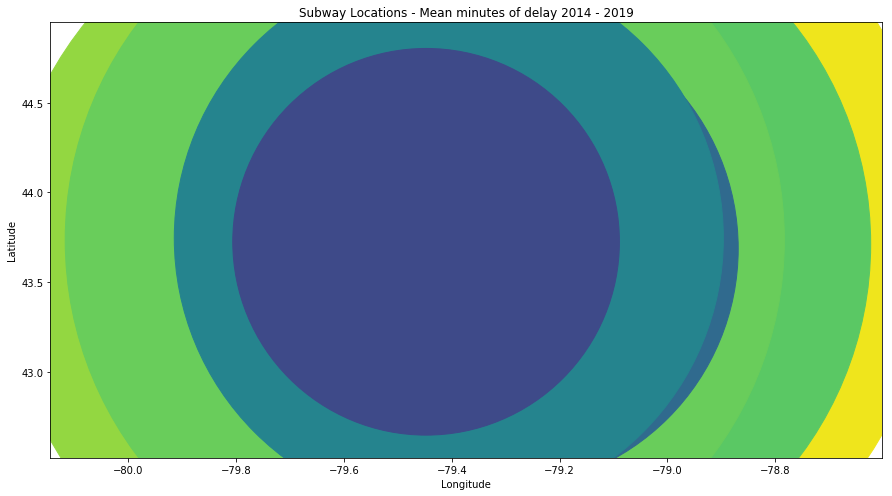

In [14]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    locations['subway_longitude'], 
    locations['subway_latitude'], 
    c = locations['Min Delay'], 
    s = locations['Min Delay']*100
)

ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('Subway Locations - Mean minutes of delay 2014 - 2019')

plt.tight_layout()

plt.savefig('Subway Locations - Mean minutes of delay 2014 - 2019')
plt.show()

In [ ]:
subway.sample(5)

In [ ]:
weather.sample(5)

In [ ]:
subway.sample(5)

In [ ]:
holidays = round(subway.groupby('holiday').agg({'Min Delay': 'mean'}), 2)
holidays

<center><h2>Exploratory Scatterplots</center></h2>

In [ ]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(subway['Mean Temp'], subway['Min Delay'])

plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(subway['Precipitation'], subway['Min Delay'])

plt.show()

<center><h2>Delay Time</h2></center>

In [ ]:
groupedbyday = subway.groupby(['Date', 'Day']).agg({'Min Delay': 'sum', 'Precipitation': 'sum'})
groupedbyday = groupedbyday.reset_index()
#groupedbyday['Precipitation'] = groupedbyday['Precipitation'] / 100 # Convert to cm

In [ ]:
groupedbyday.sort_values('Date').head(15)

In [ ]:
totaldays = len(groupedbyday)
totalmin = groupedbyday['Min Delay'].sum()
meanminperday = round(groupedbyday['Min Delay'].mean(), 2)
medianperday = round(groupedbyday['Min Delay'].median(), 2)
daysdelay = round((groupedbyday['Min Delay'].sum()/60)/24, 2)
percdelay = round(daysdelay / totaldays, 2)
sigmaday = round(groupedbyday['Min Delay'].std(), 2)
delayvariance = round(sigmaday ** 2, 2)

delaystats_dict = {
    'Total Days': totaldays,
    'Total Minutes': totalmin,
    'Days Delayed': daysdelay,
    'Mean Min. per Day': meanminperday,
    'Median Min. per Day': medianperday,
    '% of Days Delayed': percdelay,
    'Daily Sigma': sigmaday,
    'Delay Variance': delayvariance
}

delaystats = pd.DataFrame(delaystats_dict, index=['Stats'])

delaystats = delaystats.style.format({
    '% of Days Delayed': '{:.2%}'.format
})

In [ ]:
delaystats

In [ ]:
x = groupedbyday['Date']
y = groupedbyday['Min Delay']

fig, ax = plt.subplots(1, figsize = [15, 3.5])

ax.bar(
    x,
    y, 
    color = '#002147', 
    alpha = .8
)

ax.axhline(
    y = 1440, 
    color = 'red',
    lw = 2
)

ax.axhline(
    y = 0, 
    color = 'red', 
    lw = 2
)

ax.axvline(
    x = groupedbyday.iloc[0, 0], 
    color = 'red', 
    lw = 2
)

ax.axvline(
    x = groupedbyday.iloc[1945, 0], 
    color = 'red', 
    lw = 2
)

ax.set_ylabel('Minutes')
ax.set_xlabel('Days')
ax.set_title('TTC Subway Minutes Delayed by Day 2014 - 2019')

plt.minorticks_on()
plt.grid(b = True, which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.tight_layout()
plt.savefig('TTC_Subway_Mintues_Delayed_2014_2019.png')
plt.show()

Each x marker bar is representative of 1 day for a total of 1946 days. 1440 minutes are available in each day, so think of the space within the interior of the red box as time, with the dark blue bars of each delay as the amount of space in time the delays took.

In [ ]:
x = groupedbyday['Date']
y = groupedbyday['Precipitation']

fig, ax = plt.subplots(1, figsize = [15, 3.5])

ax.bar(
    x,
    y, 
    color = '#002147', 
    alpha = .8
)

ax.set_ylabel('Precipitation in mm')
ax.set_xlabel('Days')
ax.set_title('Total Precipitation Amounts 2014-2019 in mm')

plt.minorticks_on()
plt.grid(b = True, which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.tight_layout()
plt.savefig('Total Precipitation Amounts 2014-2019.png')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.hist(
    groupedbyday['Min Delay'], 
    bins = 100, 
    color = '#002147'
)

ax.set_xlabel('Mintues')
ax.set_ylabel('Count')
ax.set_title('Histogram of TTC Minutes Delayed per Day 2014-2019')

plt.grid(
    b = True, 
    which = 'major', 
    color = '#666666', 
    linestyle = '-',
    alpha = 0.75
)

plt.minorticks_on()
plt.grid(
    b = True, 
    which = 'minor', 
    color = '#666666', 
    linestyle = '-', 
    alpha = 0.2
)

plt.show()

<center><h2>Incidents</h2></center>

In [ ]:
value_counts = pd.DataFrame(subway['Description'].value_counts()).reset_index().rename(
    columns={'Description': '# of Incidents', 'index': 'Description'})

In [ ]:
value_counts.to_csv('subway_description_value_counts.csv')

In [ ]:
groupedmindelay = subway.groupby('Description').agg({
    'Min Delay': 'sum'
}).reset_index().rename(
    columns={'Min Delay': 'Minutes'
            })

groupedmindelay.head(10)

In [ ]:
delays = pd.merge(value_counts, groupedmindelay, on='Description', how='left')
delays['Min per Incident'] = round(delays['Minutes'] / delays['# of Incidents'], 3)

In [ ]:
delays.head(10)

In [ ]:
x = delays[delays['# of Incidents'] < 2000]
x = x[x['Minutes'] < 2000]
x = x.sort_values('Minutes').head(25)

In [ ]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    x['# of Incidents'], 
    x['Minutes'],
    c = x['Min per Incident'],
    alpha = .5,
    s = 150
)

ax.set_xlabel('# of Incidents')
ax.set_ylabel('Minutes')
ax.set_title('Exploring Incidents and Time')

plt.show()

In [ ]:
x

In [ ]:
list(x.columns)

In [ ]:
bar1 = x['# of Incidents']
bar2 = x['Minutes']
bar3 = x['Min per Incident']

label = x['Description']
barwidth = 1
names = list(x.columns)

bars = np.add(bar1, bar2).tolist()

fig, ax = plt.subplots(1, figsize = [12.5, 10])

ax.bar(label, bar1, color='#002147', edgecolor='white', width=barwidth)
ax.bar(label, bar2, bottom=bar1, color='#5F90B2', edgecolor='white', width=barwidth)
ax.bar(label, bar3, bottom=bars, color='#848482', edgecolor='white', width=barwidth)

plt.xticks(label, names, fontweight='bold')
ax.set_xlabel('Description')

plt.show()

<center><h2>Stations</center></h2>

In [ ]:
stations = subway.groupby('Station').agg({
    'Min Delay': 'sum', 
}).rename(
    columns={
        'Min Delay': 'Sum', 
    })

stations = round(stations[stations['Sum'] > 0], 2)

In [ ]:
stations = stations.dropna().reset_index()
len(stations)

In [ ]:
fig, ax = plt.subplots()

ax.barh(stations['Station'], stations['Sum'])

In [ ]:
stations.sort_values('Sum', ascending = False).head()

<center><h2>Days of the Week</center></h2>

In [ ]:
subway.sample(5)

In [ ]:
weekdays = subway.groupby('Day').agg({
    'Min Delay': 'sum', 
    'Min Gap': 'sum'
}).reset_index()
weekdays

In [ ]:
names

In [ ]:
bar1 = weekdays['Min Delay']
bar2 = weekdays['Min Gap']

label = weekdays['Day']
barwidth = 1
names = weekdays['Day'].unique().tolist()
dayorder = [1, 5, 6, 4, 0, 2, 3]
names = [names[i] for i in dayorder]

bars = np.add(bar1, bar2).tolist()

fig, ax = plt.subplots(1, figsize = [12.5, 10])

p1 = ax.bar(label, bar1, color='#800000', edgecolor='white', width=barwidth)
p2 = ax.bar(label, bar2, bottom=bar1, color='#888888', edgecolor='white', width=barwidth)

ax.set_ylabel('Minutes')
ax.set_xlabel('Days of the Week')
ax.set_title('Sum of Minutes per Day of the Week')

plt.legend((p1[0], p2[0]), ('Minutes Delayed', 'Gap in Minutes'))

plt.xticks(label, names)

plt.minorticks_on()
plt.grid(
    b = True, 
    which = 'minor', 
    color = '#666666', 
    linestyle = '-', 
    alpha = 0.2
)

plt.tight_layout()

plt.savefig('Sum of Minutes per Day of the Week.png')
plt.show()

In [ ]:
bar1 = x['# of Incidents']
bar2 = x['Minutes']
bar3 = x['Min per Incident']

label = x['Description']
barwidth = 1
names = list(x.columns)

bars = np.add(bar1, bar2).tolist()

fig, ax = plt.subplots(1, figsize = [12.5, 10])

ax.bar(label, bar1, color='#002147', edgecolor='white', width=barwidth)
ax.bar(label, bar2, bottom=bar1, color='#5F90B2', edgecolor='white', width=barwidth)
ax.bar(label, bar3, bottom=bars, color='#848482', edgecolor='white', width=barwidth)

plt.xticks(label, names, fontweight='bold')
ax.set_xlabel('Description')

plt.show()

<center><h2>By Line</h2></center>

In [ ]:
subway.head()

In [ ]:
line = subway.groupby(['Day', 'Line']).agg({'Min Delay': 'sum'})
line = line[line['Min Delay'] > 0]

In [ ]:
line